<a href="https://colab.research.google.com/github/DivyanshRana1/Cardiovascular-Disease-Prediction/blob/main/Stock_Price_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.04527236921386482
R-squared: 0.9961963983017127


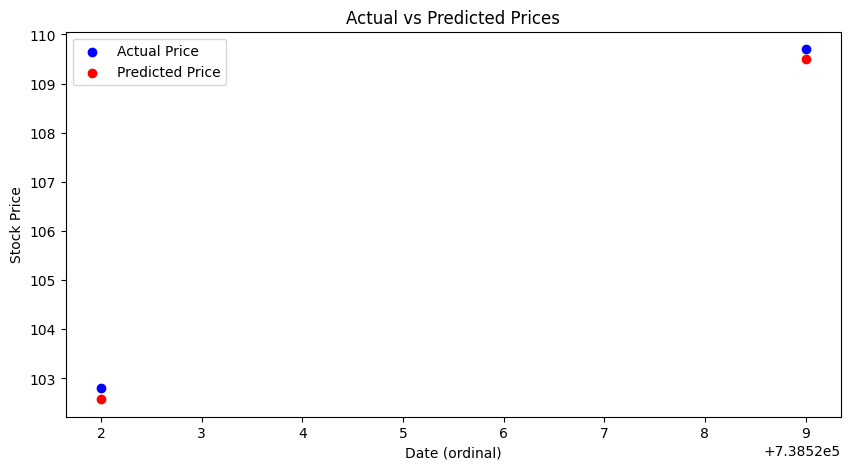


Predicted price on 2025-12-31: 1184.3163793103304


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
# Install required libraries (optional, in case they're not installed)
# You can comment these lines if already installed
!pip install scikit-learn matplotlib pandas

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset directly from Colab directory
df = pd.read_csv('/content/stock_price_sample.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert dates to ordinal (number format for regression)
df['DateOrdinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Features and target
X = df[['DateOrdinal']]
y = df['Close']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot Actual vs Predicted
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.scatter(X_test, y_pred, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date (ordinal)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Predict future price example
future_date = pd.to_datetime('2025-12-31').toordinal()
future_price = model.predict([[future_date]])
print(f"\nPredicted price on 2025-12-31: {future_price[0]}")
